# An Evaluation of Benjamin Graham's 7 Criteria for Stock Selection In The Modern Investing Environment

*A Jupyter Notebooks Backtest By Evan Reynolds*

## 1. Introduction

Benjamin Graham, well known as the "Grandfather" of value investing, is a famous value investor. Perhaps he is best known for being the teacher to arguably the most successful investor of all time, Warren Buffett. He believed that the returns of an investor were not stictly luck based, and rather that they are a function of the time and prudence an investor applies to researching and selecting their securities. His investing philosophy, specifically with regard to company stocks, focuses on investing in companies that are returning a fair compensation of economic value for the price you are paying. His philosophy and evaluation methods are detailed extensively in his investing magum opus: *The Intelligent Investor*. This detailed and thorough recount of an investor's interaction with all components of the investing world, from inflation, bonds, and all the way to investment advisors (including his teachings with respect to each of these components) was last updated by him in 1972.

&emsp; Of particular interest in *The Intelligent Investor* is chapter 14, titled *Stock Selection for the Defensive Investor*. In this chapter, Graham outlines seven criteria that he advises a defensive investor apply when searching for securities to invest in. His seven criteria are:

1. *Ample Size:* at least \\$100M in annual sales (or at least $50M in total assets for a utility company)
2. *Strong Financial Condition:* The current ratio should be at least 2, and long-term debt should not exceed working capital (or the debt should not exceed double the book value for a utility company)
3. *Earnings Stability:* Earnings should be positive in each of the last 10 years
4. *Dividend Record:* Dividends should have been paid in each of the last 20 years
5. *Earnings Growth:* At least a 33% increase in per share earnings when comparing a 3 year trailing average of earnings in the current year with that of 8 years ago
6. *Moderate P/E ratio:* The current earnings to price yield of the entire portfolio should be at least the current yield on AA grade bonds
7. *Moderate P/A ratio:* The price should be no more than 1.5 times the book value

&emsp; As the most recent issue of *The Intelligent Investor* (the final update by Graham to selection rules) was published in 1972, some rules may no longer apply in the manner that was intended. For example, a minimum of \\$100M in sales today would include the vast majority of publicly traded companies due to inflation. Thankfully, the 2003 publication of the novel includes commentary on each chapter by Jason Zwieg, a journalist at The Wall Street Journal. His commentary takes the advice of Graham in each chapter and applies it to a more modern investing environment. For chapter 14, he updates several of the rules to make them more applicable in the modern environment than the rules that Graham published in 1973. The updates for the relevant rules are:

1. *Ample Size*: A Market Cap of at least \\$2B
5. *Earnings Growth*: An increase of at least 50% over the same two 3 year moving averages
7. *Moderate P/A ratio*: The price should be no more than 2.5 times the book value

Graham does mention that an investor can break either rule 6 or 7 if they are compensated fairly in the other - for example, a higher price to assets ratio may be validated by a sufficiently lower price to earnings ratio. He suggests that a multiplication of the criteria can lead to the following combined rule, which we will use to replace the preciously stated 6 and 7:

6. *Moderate $P^2/(E\times A)$ ratio*: The product of the price to earnings and price to book ratios should be no more than 2.5 times the reciprocal of the current yield on AA bonds

This price earnings ratio should be calculated using a 3 year moving average of the companies earnings.

&emsp; Notice that criterion 2 has an alternative measure for public utility companies - this is due to the fact that these companies frequently leverage high levels of debt for investment into their industrial assets. A final note is that the 6 criteria we have do not apply to financial companies, as these companies have fundamentally different balance sheets when compared to companies in other sectors. Because of this, we will choose to exclude issues in the financial sector (Graham implies this by saying that he does not have much by way of advice when it comes to dealing with this sector). This leaves us with the final list of criteria:

1. *Ample Size*: A Market Cap of at least \\$2B
2. *Sector and Financial Condition:*
    a. The company must not come from the financial sector
    b. If the company comes from the utility sector, debt should not exceed double the book value
    c. If the company comes from any other sector, the current ratio should be at least 2, and long-term debt should not exceed working capital
3. *Earnings Stability:* Earnings should be positive in each of the last 10 years
4. *Dividend Record:* Dividends should have been paid in each of the last 20 years
5. *Earnings Growth:* At least a 50% increase in per share earnings when comparing a 3 year moving average of earnings in the current year with that of 8 years ago
6. *Moderate $P^2/(E\times A)$ ratio*: The product of the price to earnings and price to book ratios should be no more than 2.5 times the reciprocal of the current yield on AA bonds

&emsp; The purpose of this report is to evaluate the performance of portfolios built according to the above 6 criteria and infer whether or not Benjamin Graham's (and Jason Zwieg's) advice still applies to the modern investing environment. In section 2, an overview of the stock selection process and portfolio construction will be given. Section 3 is where the bulk of the coding will take place, as we need to gather necessary data and apply filters. In section 4, results and evaluations of the portfolios will be presented.

## 2. Outline of the Stock Selection and Portfolio Construction Processes

The "Benjamin Graham" portfolios will be constructed according to the following steps:

1. Take an extensive initial list of publicly traded companies. We will use the list of all publicly listed companies on the New York Stock Exchange.
2. Pass each company through all 6 of the criteria listed above (not necessarily in the order listed). As soon as a company fails to meet a criterion, it is removed from the list.
3. When all companies have been passed through all 6 filters, those on the final list will be included in the portfolio.

&emsp; The portfolio will be constructed as an equally weighted portfolio of the companies on the final list. As the logic behind such a strategy is inherently value-oriented, we will evaluate the portfolio over a relatively long time horizon of 10 years. The intial construction will occur in May 2013 (so that the filters based on information from 2012 company financials avoid look-ahead bias - the majority companies will have their year-end results available by May of the following year) and therefore evaluated between May 2013 and April 2023.

&emsp; We will also create several rebalanced portfolios, where the company list is passed through the 6 criteria again at regular intervals to reconstruct the portfolio based on the same criteria but at the current point in time. This could perhaps offer advantages given that a company's financial postition and valuation could change quite drastically over the course of 10 years. The three rebalanced portfolios will be one that is rebalanced every 5 years, one that is rebalanced every 2 years, and one that is rebalanced every year. Trading fees will be applied at each rebalancement. Over the time horizon, dividends will be reinvested into the position from which they are earned. It is assumed that fractional shares are available.

## 3. Data Collection and Criteria Filtering
### Part 1: Company List and Fundamental Data

&emsp; From a high level, since we will consider whether or not to add any stock listed on the NYSE exhange to our portfolio, we need access to a list of all such companies. Once this is obtained, we need access to the following data for these companies to determine whether or not they should be includeds:

- Sector
- Market Cap
- Debt
- Earnings over the past 10 years
- Dividend payments over the prior 20 years
- Book Value
- Current Assets
- Current Liabilities

We need these figures as at the time of portfolio construction (and also at each time that it is rebalanced).

&emsp; For portfolio evaluation, we also need the stocks prices over the evaluation period. Since rebalancing will happen at most once per year, monthly price movements will be more than sufficient.

To start, we need the list of all companies traded on the NYSE, which is available on their website (https://www.nyse.com/listings_directory/stock).

The below code will gather a list of all symbols from the above link.

In [1]:
#import webscraping packages
from selenium import webdriver

from selenium.webdriver.common.by import By

from selenium.webdriver.support.ui import Select

#import exception to be used to terminate loop
from selenium.common.exceptions import TimeoutException

from selenium.common.exceptions import ElementNotInteractableException

#import wait time to actually access next button
from selenium.webdriver.support.wait import WebDriverWait

#import requests to speed up the scraping of fundamental data
import requests

from bs4 import BeautifulSoup

# Import .env file
import os
from dotenv import load_dotenv

load_dotenv
chrome_driver_path = os.getenv('CHROME_DRIVER_PATH')

In [ ]:
#launch webdriver

driver = webdriver.Chrome(chrome_driver_path)

nyse_link = 'https://www.nyse.com/listings_directory/stock'

#go to directory page
driver.get(nyse_link)

#click the accept cookies button
cookie_button = WebDriverWait(driver,30).until(lambda x: x.find_element(By.ID,"onetrust-accept-btn-handler"))
#create indicator
x=0
while x==0:
    try:
        cookie_button.click()
        x+=1
    except ElementNotInteractableException:
        pass

#create empty lists to store tickers and company names
tickers = []
company_names = []

#create lists we will use to identify companies we don't want to include
#these incldue identifiers for class b shares, preferred shares, acquisition corps, etc

banned_tickers = ['.','p'] #check second last position for to see if it matches either character
acquisition = 'ACQUISITION' #if this is in the company's name, it is likely a shell company and will be excluded
percentage = '%'

#create loop that will click next link, as long as it is clickable, 
#and place all tickers and company names into the lists above
try:
    while True:
        #get all rows on page
        #first wait until table on page is visible by code
        WebDriverWait(driver,10).until(lambda x: x.find_element(By.TAG_NAME,"table"))
        nyse_soup = BeautifulSoup(driver.page_source,'html.parser')
        rows = nyse_soup.find_all('tr')
        
        #format for web page: we will have one header row, followed by rows containing tickers and company names
        #in consecutive columns
        
        for row in rows[1:]:#skip first row as it contains headers
            cols = row.find_all('td')
            #assign values for ticker and company_name
            ticker = cols[0].get_text(strip = True)
            company_name = cols[1].get_text(strip = True)
            #move on if either contains a banned substring
            if (len(ticker)>2) and (ticker[-2] in banned_tickers):
                continue
            if (acquisition in company_name) or (percentage in company_name):
                continue
                
            #now we can concatenate ticker and company values onto the lists respectively
            tickers.append(ticker)
            company_names.append(company_name)
        
        #create object to store next button
        next_button = WebDriverWait(driver,10).until(lambda x: x.find_element(By.XPATH,"//a[@rel='next']"))
        #click next button
        next_button.click()
#end code when next button isn't found    
except TimeoutException:
    print('Page Timed Out: You are either on the last page, and have collected lists of all companies and tickers, or there was an error.')
    
    
driver.close()

In [3]:
print("You now have a list of tickers for "+str(len(tickers))+" companies.")

You now have a list of tickers for 5599 companies.


&emsp; Now that we have our list of all companies traded on the NYSE (except for acquisition companies and preferred shares and warrants that were rejected), we need to gather sufficient financial information for all of these companies to determine whether or not they pass the fundamental portion of our criteria. I decided to gather data from roic.ai (https://roic.ai/), which summarizes financial data from SEC filings for companies and presents it in a yearly table. The table for their financials goes quite far back historically (for example, Apple's financial records stretch back to 1985), which is necessary for our filters as we need to verify whether their dividends have been paid for each of the 20 years prior to stock selection (meaning that we need data going back to at least 1993 if we are making our initial portfolio selection based on 2012 financials).

&emsp; From this website, we can scrape the financial data for each company in our list. When doing this, we can employ our first filter - if the company is in the Financial Services sector, we will not gather any data and move on to the next company. The below code will scrape the financial data we require - we will scrape the data for all available years, as more recent years may be needed when rebalancing.

In [4]:
#create dict to store tickers and data
ticker_data = {}
ticker_data['Ticker'] = []
ticker_data['Company Name'] = []
ticker_data['Sector'] = []
ticker_data['Years'] = []
ticker_data['EPS'] = []
ticker_data['Shares Outstanding'] = []
ticker_data['Current Assets'] = []
ticker_data['Short-Term Debt'] = []
ticker_data['Current Liabilities'] = []
ticker_data['Long-Term Debt'] = []
ticker_data['Book Value'] = []
ticker_data['Dividends Paid'] = []

fc = 0 #counter for the number of financial companies dropped
err = 0 #counter for the number of tickers that created an error

#create function to format accounting strings
def formatStr(s):
    s = s.replace(",","")
    if s[0] == "(":
        return -1*float(s[1:-1])
    elif s[0] == "-":
        return 0
    else:
        return float(s)
    

#loop through every ticker
for ticker in tickers:
    #go to roic page with company's financials
    page = requests.get('https://roic.ai/financials/'+ticker+'?fs=annual')
    
    #create soup
    ticker_soup = BeautifulSoup(page.text,'html.parser')
    
    #get company's sector
    try:
        header = ticker_soup.find_all('span',attrs={"class":"text-sm text-neutral-400"})[0].get_text()
    except IndexError: #catch when list is empty, as this is likely caused by a 404 or some other error
        err += 1
        continue
        
    sector = header[header.find('·')+2:header.find('sector')-1]#sector will be nested between these two strings
    
    #check if company is in the financial services sector - continue on if it is
    if sector == 'Financial Services':
        fc += 1
        continue
    
    #create empty lists for values
    years = []
    eps = []
    shares = []
    ca = []
    std = []
    cl = []
    ltd = []
    bv = []
    dp = []
    
    #gather financial data and append to dict
    year_row = ticker_soup.find_all('div',attrs={"class":"w-[80px] select-none bg-white pr-1 grow font-light text-right text-sm text-neutral-400"})
    
    #find table that contains financial info
    financial_info = []

    try:
        for div in ticker_soup.find('div',attrs={"class":"flex-col overflow-x-auto"}):
            financial_info.append(div)
    except TypeError: #data table not available on site
        err += 1
        continue
        
        
    #pull select rows - actual data starts at 5th div in these rows
    eps_row = financial_info[26].find_all('div')#EPS row
    shares_row = financial_info[28].find_all('div')#shares outstanding row
    ca_row = financial_info[37].find_all('div')#Current Assets row
    std_row = financial_info[49].find_all('div')#Short-term debt row
    cl_row = financial_info[53].find_all('div')#Current Liabilities row
    ltd_row = financial_info[54].find_all('div')#Long-term debt row
    bv_row = financial_info[67].find_all('div')#Book Value row
    dp_row = financial_info[93].find_all('div')#dividends paid row
    
    try:
        for i in range(5,len(eps_row)):
            years.append(int(year_row[i-5].get_text()))#since data in this row starts at 0      
            eps.append(formatStr(eps_row[i].get_text()))
            shares.append(formatStr(shares_row[i].get_text()))
            ca.append(formatStr(ca_row[i].get_text()))
            std.append(formatStr(std_row[i].get_text()))
            cl.append(formatStr(cl_row[i].get_text()))
            ltd.append(formatStr(ltd_row[i].get_text()))
            bv.append(formatStr(bv_row[i].get_text()))
            dp.append(formatStr(dp_row[i].get_text()))
    except ValueError:#no years available, skip company
        err +=1
        continue
        
    #append data to dict
    ticker_data['Ticker'].append(ticker)
    ticker_data['Company Name'].append(company_names[len(ticker_data['Ticker'])+fc+err-1])
    ticker_data['Sector'].append(sector)
    ticker_data['Years'].append(years)
    ticker_data['EPS'].append(eps)
    ticker_data['Shares Outstanding'].append(shares)
    ticker_data['Current Assets'].append(ca)
    ticker_data['Short-Term Debt'].append(std)
    ticker_data['Current Liabilities'].append(cl)
    ticker_data['Long-Term Debt'].append(ltd)
    ticker_data['Book Value'].append(bv)
    ticker_data['Dividends Paid'].append(dp)

In [6]:
print(str(fc)+" Financial Services companies were dropped.")
print(str(err)+" companies were dropped due to web page errors (likely no data available).")
print(str(len(ticker_data['Ticker']))+" companies remain.")

1205 Financial Services companies were dropped.
144 companies were dropped due to web page errors (likely no data available).
4250 companies remain.


&emsp; As we can see from the above, we have already reduced our list by about 20% by removing all financial services companies.

### Part 2: Fundamental Filters

&emsp; With the fundamental data that we have now gathered for each company, we can begin to calculate the fundamental metrics that we will use to evaluate whether or not a company should remain in the portfolio. We will begin to apply filters one by one, and at each step present the number of companies that were dropped due to not passing the given filter. As we have not yet gathered price data, there are several fitlers that will remain to be applied after this process. As we will also evaluate the strategy with different rebalancing periods (the shortest of which being a year), we will have to apply to filters to our list at each year in our 10 year evaluation window.

In [7]:
#import numpy
import numpy as np

#create counters for the number of companies dropped at each filter for each year
hd = np.zeros(10) #dropped for insufficient history
dd = np.zeros(10) #dropped for insufficient dividend stability
esd = np.zeros(10) #dropped for insufficient earnings stability
egd = np.zeros(10) #dropped for insufficient earning growth
fcd = np.zeros(10) #dropped for insufficient financial condition

#create nested list for tickers that pass through all of the filters for each year
years = np.arange(1993,2003)
rem_tickers = [[],[],[],[],[],[],[],[],[],[]]   

#loop through dict
for i in range(len(ticker_data['Ticker'])-1,-1,-1):
    #loop through starting years
    for k in range(0,len(years)):
        #check for insufficient history
        if len(ticker_data['Years'][i]) == 0 or ticker_data['Years'][i][0] < 0 or ticker_data['Years'][i][0] > years[k]:
            hd[k] +=1
            continue
        
        starting_index = ticker_data['Years'][i].index(years[k])
        #check for insufficient dividends
        if not (all(j<0 for j in ticker_data['Dividends Paid'][i][starting_index:starting_index+20])):
            dd[k] += 1
            continue
    
        #check for insufficient EPS
        if not (all(j>0 for j in ticker_data['EPS'][i][starting_index+10:starting_index+20])):
            esd[k] += 1
            continue
        
        #check for insufficient Earnings growth
        firstAvg = sum(ticker_data['EPS'][i][starting_index+10:starting_index+13])/3
        secondAvg = sum(ticker_data['EPS'][i][starting_index+17:starting_index+20])/3
        earningsIncrease = (secondAvg-firstAvg)/firstAvg
    
        if earningsIncrease < 0.5:
            egd[k] += 1
            continue
        
    
        #check for insufficient financial condition
        if ticker_data['Sector'][i] == 'Utilities':
            debt = ticker_data['Short-Term Debt'][i][starting_index+19]+ticker_data['Long-Term Debt'][i][starting_index+19]
            if debt > 2*ticker_data['Book Value'][i][starting_index+19]:
                fcd[k] += 1
                continue         
        else:
            if not ((ticker_data['Current Assets'][i][starting_index+19] > 2*ticker_data['Current Liabilities'][i][starting_index+19]) and 
                 (ticker_data['Long-Term Debt'][i][starting_index+19] < ticker_data['Current Assets'][i][starting_index+19]-ticker_data['Current Liabilities'][i][starting_index+19])):
                fcd[k] += 1
                continue
        
        #add ticker if it has passed all filters
        rem_tickers[k].append(ticker_data['Ticker'][i])

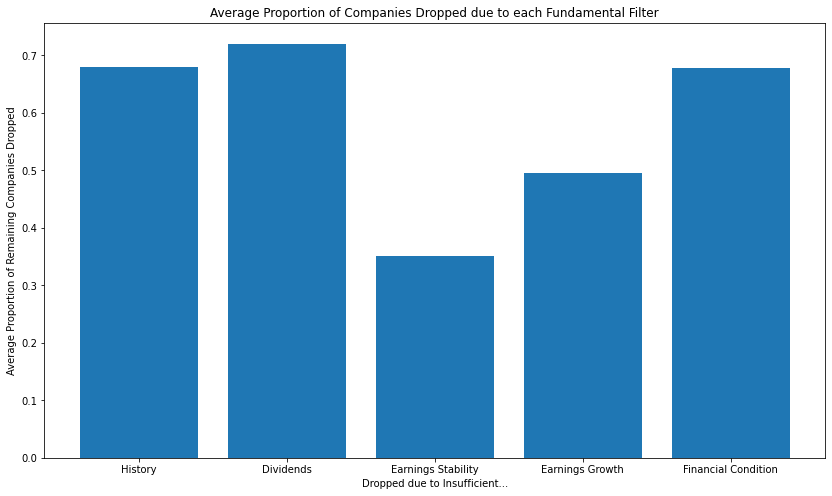

The Average Number of Companies Remaining in the List is: 37.9


In [8]:
#Create vector of percentage of companies dropped from those remaining at each step, since the absolute numbers will decrease substantially from step to step
hdp = hd/(hd+dd+esd+egd+fcd+[len(t) for t in rem_tickers])
ddp = dd/(dd+esd+egd+fcd+[len(t) for t in rem_tickers])
esdp = esd/(esd+egd+fcd+[len(t) for t in rem_tickers])
egdp = egd/(egd+fcd+[len(t) for t in rem_tickers])
fcdp = fcd/(fcd+[len(t) for t in rem_tickers])

#create graph of average percentages
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.bar(x=[1,2,3,4,5],height = [np.mean(hdp),np.mean(ddp),np.mean(esdp),np.mean(egdp),np.mean(fcdp)],tick_label=['History','Dividends','Earnings Stability','Earnings Growth','Financial Condition'])
plt.xlabel('Dropped due to Insufficient...')
plt.ylabel('Average Proportion of Remaining Companies Dropped')
plt.title('Average Proportion of Companies Dropped due to each Fundamental Filter')
plt.show()

print('The Average Number of Companies Remaining in the List is: '+str(np.mean([len(t) for t in rem_tickers])))

&emsp; As we can see from the above graph, roughly 70% of companies were immediately dropped from the list due to having insufficient history (a company must have financials dating back to at least 2002 for the last year of rebalancement). Another ~70% of those companies were dropped due to having at least one year in which they didn't pay a positive dividend. From there, ~35% of these were dropped due to having at least one year of negative earnings in the last ten years, and then ~50% of those were dropped due to not growing their earnings sufficiently over the past ten years. Finally, ~70% of those were dropped due to insufficiently strong financial health. (The percentages displayed above are the average relative percentage of companies dropped at each step, i.e., the percentage dropped relative to the number remaining after the previous step, with the average being taken over each year.)

### Part 3: Price related filters

&emsp; To evaluate inclusion metrics related to price for companies, which includes evaluating the company's $P^2/(E\times A)$ ratio as well as its market cap, we need access to its price data. (The reason this is done now as opposed to in part 1 is to limit the number of companies for which we need to pull price data.) To begin, we will build a scraper to pull monthly price data from Yahoo Finance (https://finance.yahoo.com/) (since the most frequent rebalancing will be yearly, we do not need to pull prices at a shorter interval).

&emsp; At this point, it is worth re-emphasizing which month of the year we will use to construct the portfolio intially and also rebalance it in future years for the rebalanced portfolios. Our fundamental metrics are taken from company's year end financial statements. The overwhelming majority of companies close their fiscal years on December 31st (3). However; the results of these reports are generally not made public until several months after the fiscal year has been closed by the company. Because of this delay, we would likely be building a significant amount of look-ahead bias into our portfolio if we were to construct it in January when using the past year's financial metrics as filters. Instead, we will construct the portfolio in May (and rebalance it then in each subsequent year). While this won't line up with every company's fiscal year end and reporting timeline, it is a simplifying assumption that should at least be accurate for the majority of companies in our portfolio.

&emsp; Below, we will build a scraper to pull monthly price data for each ticker from Yahoo Finance over the whole evaluation period.

In [ ]:
#create a dict to store 
ticker_pd = {}
ticker_pd['Ticker'] = []
ticker_pd['Price Data'] = []
ticker_pd['Div Data'] = []

#open selenium driver
driver = webdriver.Chrome(chrome_driver_path)

#loop through remaining tickers and get prices
for i in range(0,len(rem_tickers)):
    for ticker in rem_tickers[i]:
        if ticker in ticker_pd['Ticker']:#ticker's data was already pulled for a previous year
            continue
        #url for monthly price on yahoo finance from May 2013 to May 2022
        driver.get('https://finance.yahoo.com/quote/'+ticker+'/history?period1=1367366400&period2=1682812800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true')
    
        #need to scroll to bottom of page for all rows to load
        driver.execute_script("window.scrollTo(0, 10000);")
        driver.execute_script("window.scrollTo(0, 20000);")
        driver.execute_script("window.scrollTo(0, 30000);")
        driver.execute_script("window.scrollTo(0, 30000);")
        driver.execute_script("window.scrollTo(0, 30000);")
        driver.execute_script("window.scrollTo(0, 30000);")
        driver.execute_script("window.scrollTo(0, 30000);")
        driver.execute_script("window.scrollTo(0, 30000);")
        
        #create soup
        price_soup = BeautifulSoup(driver.page_source,'html.parser')
    
        rows = price_soup.findAll('tr',attrs={'class':'BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)'})
        #rows will have both prices and dividends
        company_pdata = [[],[]] #setup lists of dates and closing prices
        company_ddata = [[],[]] #setup lists of dates and dividend distributions
    
        #loop through rows
        for row in rows:
            cols = row.findAll('td')
            #date will be in the first column
            #if row is a price row, closing price will be in the 5th column
            #if row is a dividend row, dividend amount will be in the second column
            #if row is a stock split row, split info will be in column 2, and row can be skipped
            if 'Stock Split' in cols[1].get_text(strip=True):
                continue
            if 'Dividend' in cols[1].get_text(strip=True):
                #row is a dividend row
                company_ddata[0].append(cols[0].get_text(strip=True))
                company_ddata[1].append(float(cols[1].get_text(strip=True).removesuffix('Dividend').replace(",","")))#delete dividend from end of the string
            else:
                #row is a price row
                company_pdata[0].append(cols[0].get_text(strip=True))
                company_pdata[1].append(float(cols[4].get_text(strip=True).replace(",","")))
        
        
        #append ticker, price, and div data to ticker_pd
        ticker_pd['Ticker'].append(ticker)
        ticker_pd['Price Data'].append(company_pdata)
        ticker_pd['Div Data'].append(company_ddata)

driver.close()

&emsp; Now that we have our price data, we need data for the yields on AA bonds, the reciprocals of which will be measured against each company's $P^2/(E\times A)$ ratio. A dataset is accessible on NASDAQ's website (https://data.nasdaq.com/data/ML/AAY-us-aa-bond-index-yield). We will pull the data for each year at the beginning of May to line up with the construction and rebalancing times for our portfolio. The result will be a small vector with 10 years of returns and thus can easily be pulled manually.

In [10]:
bond_yields = [0.0196,0.0249,0.0237,0.0231,0.0268,0.0344,0.031,0.0189,0.0186,0.0375]

&emsp; We can now apply the valuation filters to the tickers remaining from our fundamental filters. For each year, we will need to calculate the companies' $P^2/(E\times A)$ ratios, as well as their market caps. These will then be compared against the appropriate year's bond yield and our Market Cap threshold of $2B, respectively. Once those two filters have been applied, we will be left with our final portfolios for each year. Recall that company earnings are calculated as a 3 year trailing average in the P/E ratio.

In [37]:
#create list to store final tickers
final_tickers = [[],[],[],[],[],[],[],[],[],[]] 

#create counters for companies dropped at each filter
mcd = np.zeros(10)
p2d = np.zeros(10)

#create vector of years that will be looped through
yearsp = np.arange(2013,2023)

for i in range(0,len(rem_tickers)):
    for ticker in rem_tickers[i]:
        #locate index of company in fundamental data dict
        ticker_index = ticker_data['Ticker'].index(ticker)
        #locate index for year in fundamental data tables
        year_index = ticker_data['Years'][ticker_index].index(yearsp[i]-1) #should be the same for every ticker in loop, but we will check at this level just in case
        #check if ticker's market cap exceeds $2B
        #get shares outstanding for the appropriate year
        shares_outstanding = ticker_data['Shares Outstanding'][ticker_index][year_index]
        #get ticker index for price data
        ticker_index2 = ticker_pd['Ticker'].index(ticker)
        #get price index
        try:
            p_index = ticker_pd['Price Data'][ticker_index2][0].index('May 01, '+str(yearsp[i]))
        except ValueError:#company doesn't have enough price data available on yahoo. assume it is a smaller company
            mcd[i] += 1
            continue
            
        price = ticker_pd['Price Data'][ticker_index2][1][p_index]
        market_cap = price*shares_outstanding
        
        if market_cap < 2000:#shares outstanding are in millions
            mcd[i] += 1
            continue
        #get 3 year trailing average of earnings from that year
        eps_avg = np.mean(ticker_data['EPS'][ticker_index][year_index-2:year_index+1])
        #get book value
        book_value = ticker_data['Book Value'][ticker_index][year_index]
        
        #check if ticker's P^2/(ExA) ratio exceeds the reciprocal of the bond yields 
        #can be calculated as (P^2*SO)/(EPS*BV)
        ratio = (price**2)*shares_outstanding/(eps_avg*book_value)
        if ratio > 2.5*(1/bond_yields[i]):
            p2d[i] +=1
            continue
        
        #ticker has passed filters, add to list
        final_tickers[i].append(ticker)

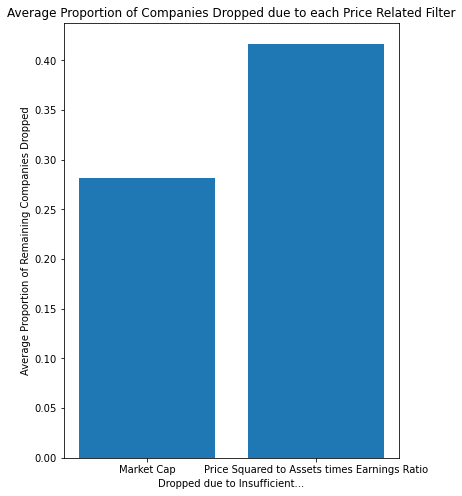

The Average Number of Companies Remaining in the Final List is: 16.0


In [38]:
#Create vector of percentage of companies dropped from those remaining at each step, since the absolute numbers will decrease substantially from step to step
mcdp = mcd/(mcd+p2d+[len(t) for t in final_tickers])
p2dp = p2d/(p2d+[len(t) for t in final_tickers])


#create graph of average percentages
import matplotlib.pyplot as plt

plt.figure(figsize=(6,8))
plt.bar(x=[1,2],height = [np.mean(mcdp),np.mean(p2dp)],tick_label=['Market Cap','Price Squared to Assets times Earnings Ratio'])
plt.xlabel('Dropped due to Insufficient...')
plt.ylabel('Average Proportion of Remaining Companies Dropped')
plt.title('Average Proportion of Companies Dropped due to each Price Related Filter')
plt.show()

print('The Average Number of Companies Remaining in the Final List is: '+str(np.mean([len(t) for t in final_tickers])))

&emsp; The above graph shows that approximately 30% of our remaining companies were dropped due to having too small of a market cap, and from there ~45% of those remaining were dropped due to having too high of a valuation.

## 4. Portfolio Performance and Evaluation

&emsp; Now that we have constructed our final lists of companies to be included in our portfolio, it is time to measure their performances. Recall that we will measure the performance of four portfolios: one with no rebalancing, one with a single rebalancement after 5 years, one with a rebalancement every two years, and finally one that rebalances every year. We assume an intial portfolio size of $100,000, with rebalancing costs of 1.5% of the portfolio size. The portfolios balances are calculated below, and a graph is displayed showing their performance over the 10 year span alongside the S&P 500 for reference (speciafically, S&PTR index, which calculates the returns of the S&P 500 with dividend reinvestment). Several other performance metrics for the portfolios are defined and displayed as well.

In [39]:
#create price data dict for final tickers
from datetime import datetime #need to convert dates to datetime

final_tickers_pd = {}
final_tickers_pd['Ticker'] = []
final_tickers_pd['Price Data'] = []
final_tickers_pd['Div Data'] = []

#loop through tickers and do the following:
    #convert date columns to datetimes
    #reverse order of both date and price columns so that the most recent entries come last
for i in range(0,len(final_tickers)):
    for ticker in final_tickers[i]:
        if ticker in final_tickers_pd['Ticker']:
            continue #ticker's data has already been reformatted
        
        #append ticker and price data
        final_tickers_pd['Ticker'].append(ticker)
        
        price_data = []
        price_dates = [datetime.strptime(d,'%b %d, %Y').date() for d in ticker_pd['Price Data'][ticker_pd['Ticker'].index(ticker)][0]]
        price_dates.reverse()
        price_data.append(price_dates)#append dates converted to date objects and with order reversed
        prices = ticker_pd['Price Data'][ticker_pd['Ticker'].index(ticker)][1]
        prices.reverse()
        price_data.append(prices)#append prices with order reversed
        final_tickers_pd['Price Data'].append(price_data)
        
        div_data = []
        div_dates = [datetime.strptime(d,'%b %d, %Y').date() for d in ticker_pd['Div Data'][ticker_pd['Ticker'].index(ticker)][0]]
        div_dates.reverse()
        div_data.append(div_dates)#append dates converted to date objects and with order reversed
        div_vals = ticker_pd['Div Data'][ticker_pd['Ticker'].index(ticker)][1]
        div_vals.reverse()
        div_data.append(div_vals)
        #append dividend payments with order reversed
        final_tickers_pd['Div Data'].append(div_data)
        
#create portfolios - with lists of stocks that will be held and the corresponding dates they will be held from
portfolio_10yr = [[final_tickers[0]],[datetime(2013,5,1).date()]] #no rebalancing
portfolio_5yr = [[final_tickers[i] for i in [0,5]],[datetime(i,5,1).date() for i in [2013,2018]]] #rebalance every 5 years
portfolio_2yr = [[final_tickers[i] for i in [0,2,4,6,8]],[datetime(i,5,1).date() for i in [2013,2015,2017,2019,2021]]] #rebalance every two years
portfolio_1yr = [[final_tickers[i] for i in list(range(0,10))],[datetime(i,5,1).date() for i in list(range(2013,2023))]] #yearly rebalancing


#create function to evaluate each portfolio, with output being a dict with portfolio values at each month, dates, dividends paid, and fees
def portfolio_evaluate(initial_size,portfolio_tickers,trade_dates,trade_fee):
    return_dict = {}
    return_dict['Portfolio Balance'] = []
    return_dict['Dates'] = final_tickers_pd['Price Data'][0][0] #dates will all be the same
    return_dict['Dividends'] = []
    return_dict['Fees'] = []
    
    #create logger for portfolio allocation which will be updated to calculate the portfolio value
    portfolio_allocation = [np.zeros(len(portfolio_tickers[0])),np.zeros(len(portfolio_tickers[0]))]
    #first entry is to keep track of the number of shares in each ticker, second is to keep track of the corresponding value
    #create tracker for the number of rebalances done already so we know where to look in the tickers vector
    k=0
    #create list of ticker locations in price data dict that can be called 
    ticker_loc = [final_tickers_pd['Ticker'].index(t) for t in portfolio_tickers[0]]
    
    #loop through dates and calculate the portoflio balance at each day
    for i in range(0,len(return_dict['Dates'])):
        fees = 0
        dividends = 0
        if return_dict['Dates'][i] in trade_dates: #date is a portfolio construction or rebalancing date
            if k == 0: #date is the portfolio construction date
                #calculate target weights
                weight = 1/len(portfolio_tickers[k])
                for j in range(0,len(portfolio_tickers[k])):
                    #calculate number of shares purchased for each ticker
                    price = final_tickers_pd['Price Data'][ticker_loc[j]][1][i]
                    portfolio_allocation[0][j] = initial_size*weight/price #we will neglect fees for the initial construction
                    portfolio_allocation[1][j] = initial_size*weight
                k+=1
            
            else:#date is a portfolio rebalancing date
                #create new vectors for portfolio allocation
                new_balances = np.zeros(len(portfolio_tickers[k]))
                new_shares = np.zeros(len(portfolio_tickers[k]))
                #calculate target weights
                weight = 1/len(portfolio_tickers[k])
                
                bal = 0
                #get dividends and balance for last portfolio
                for j in range(0,len(portfolio_tickers[k-1])):
                    date_index = -1
                    try:
                        #we're assuming there's never more than one dividend distribution in a month
                        date_index = [((d >= return_dict['Dates'][i-1]) & (d < return_dict['Dates'][i])) for d in final_tickers_pd['Div Data'][ticker_loc[j]][0]].index(True)
                        dividends += final_tickers_pd['Div Data'][ticker_loc[j]][1][date_index]*portfolio_allocation[0][j]
                    except ValueError:#no dividends for the month
                        pass

                    bal += portfolio_allocation[0][j]*final_tickers_pd['Price Data'][ticker_loc[j]][1][i]
                #add balance dividends to bal
                bal += dividends
                #calculate new amounts of each share to buy
                new_ticker_loc = [final_tickers_pd['Ticker'].index(t) for t in portfolio_tickers[k]]
                
                #calculate fees
                fees += bal*(trade_fee)
                for j in range(0,len(new_balances)):
                    price = final_tickers_pd['Price Data'][new_ticker_loc[j]][1][i]
                    new_shares[j] = bal*weight*(1-trade_fee)/price #we will neglect fees for the initial construction
                    new_balances[j] = bal*weight*(1-trade_fee)
                
                ticker_loc = new_ticker_loc
                portfolio_allocation[0] = new_shares
                portfolio_allocation[1] = new_balances
                k+=1
            
        else:#date is not a rebalancing or construction date
        #need to add dividends and then calculate new balance, dividends will automatically be reinvested into the same stock
            for j in range(0,len(portfolio_tickers[k-1])):
                date_index = -1
                try:
                    #we're assuming there's never more than one dividend distribution in a month
                    date_index = [((d >= return_dict['Dates'][i-1]) & (d < return_dict['Dates'][i])) for d in final_tickers_pd['Div Data'][ticker_loc[j]][0]].index(True)
                    div = final_tickers_pd['Div Data'][ticker_loc[j]][1][date_index]*portfolio_allocation[0][j]
                    dividends += div
                    new_shares = div/final_tickers_pd['Price Data'][ticker_loc[j]][1][i]
                    portfolio_allocation[0][j] += new_shares #add new shares to portfolio allocation vector
                except ValueError:#no dividends for the month
                    pass
         
                #update values
                portfolio_allocation[1][j] = final_tickers_pd['Price Data'][ticker_loc[j]][1][i]*portfolio_allocation[0][j]
        
        return_dict['Portfolio Balance'].append(sum(portfolio_allocation[1]))
        return_dict['Dividends'].append(dividends)
        return_dict['Fees'].append(fees)
        
    return(return_dict)

In [54]:
#create portfolio performances
portfolio_10yr_perf = portfolio_evaluate(100000,portfolio_10yr[0],portfolio_10yr[1],0.015)
portfolio_5yr_perf = portfolio_evaluate(100000,portfolio_5yr[0],portfolio_5yr[1],0.015)
portfolio_2yr_perf = portfolio_evaluate(100000,portfolio_2yr[0],portfolio_2yr[1],0.015)
portfolio_1yr_perf = portfolio_evaluate(100000,portfolio_1yr[0],portfolio_1yr[1],0.015)

In [ ]:
#load in benchmark - the S&P total return index
driver = webdriver.Chrome(chrome_driver_path)

#url for monthly price on yahoo finance from May 2013 to May 2022
driver.get('https://finance.yahoo.com/quote/%5ESP500TR/history?period1=1367366400&period2=1682812800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true')
    
#need to scroll to bottom of page for all rows to load
driver.execute_script("window.scrollTo(0, 10000);")
driver.execute_script("window.scrollTo(0, 20000);")
driver.execute_script("window.scrollTo(0, 30000);")  
    
#create soup
price_soup = BeautifulSoup(driver.page_source,'html.parser')
    
rows = price_soup.findAll('tr',attrs={'class':'BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)'})
benchmark_pdata = [[],[]] #setup lists of dates and closing prices
    
#loop through rows
for row in rows:
    cols = row.findAll('td')
    #date will be in the first column
    #if row is a price row, closing price will be in the 5th column
    #if row is a dividend row, dividend amount will be in the second column. Shouldn't be any in this case
    #if row is a stock split row, split info will be in column 2, and row can be skipped
    if 'Stock Split' in cols[1].get_text(strip=True):#shouldn't be any as this is a total return index
        continue

    benchmark_pdata[0].append(cols[0].get_text(strip=True))
    benchmark_pdata[1].append(float(cols[4].get_text(strip=True).replace(",","")))
        
driver.close()

#format dates and reverse orders of vectors
for date in benchmark_pdata[0]:
    date = datetime.strptime(date,'%b %d, %Y').date()
    
benchmark_pdata[0].reverse()
benchmark_pdata[1].reverse()

#calculate benchmark portfolio values if initial investment is $100,000
import pandas as pd
df = pd.DataFrame()
df['Date'] = portfolio_10yr_perf['Dates']
df['Benchmark Value'] = [(1+(price-benchmark_pdata[1][0])/benchmark_pdata[1][0])*100000 for price in benchmark_pdata[1]]

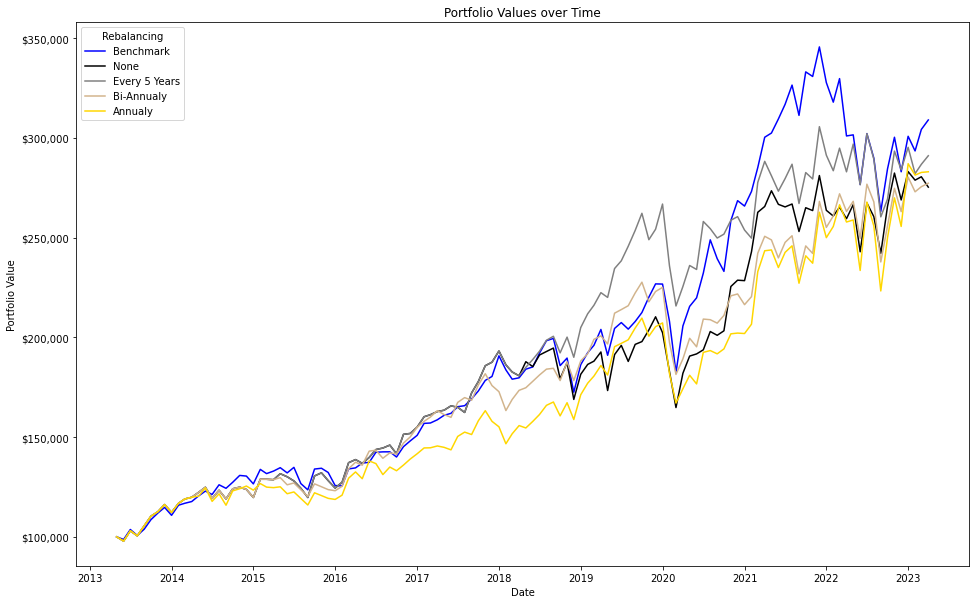

In [132]:
#let's add the other portfolio values to the df to begin our analytics
for (i,j) in zip(['10 Year Portfolio Value','5 Year Portfolio Value','2 Year Portfolio Value','1 Year Portfolio Value'],[portfolio_10yr_perf,portfolio_5yr_perf,portfolio_2yr_perf,portfolio_1yr_perf]):
    df[i] = j['Portfolio Balance']
    
#create columns for df returns. Use log returns
for i in ['Benchmark Value','10 Year Portfolio Value','5 Year Portfolio Value','2 Year Portfolio Value','1 Year Portfolio Value']:
    col_name = i[:-5]+'Returns'
    df[col_name] = np.log(df[i]) - np.log(df[i].shift(1))
    
#create graph with lines for each portfolio's performance
x = df['Date']

fig,ax = plt.subplots(figsize=(16,10))

ax.plot(x,df['Benchmark Value'],color='blue')
ax.plot(x,df['10 Year Portfolio Value'],color='black')
ax.plot(x,df['5 Year Portfolio Value'],color='grey')
ax.plot(x,df['2 Year Portfolio Value'],color='tan')
ax.plot(x,df['1 Year Portfolio Value'],color='gold')
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.set_title('Portfolio Values over Time')
ax.yaxis.set_major_formatter('${x:,.0f}')
plt.legend(['Benchmark','None','Every 5 Years','Bi-Annualy','Annualy'],loc='upper left',title='Rebalancing')
plt.show()

&emsp; As the graph above depicts, none of the portfolios outperform the benchmark in the period tested, although they all stay relatively close. The portfolio with one rebalancement after 5 years performs the best of the portfolios created, and even achieves substantial outperformance of the benchmark up until the onset of the pandemic in 2020, after which it underperforms the benchmark. All portfolios appear to be in the 170-200% range for total returns.

&emsp; Below, an array of metrics used to evaluate the portfolio are detailed:

- The **sharpe ratio**, is a common metric utilized in portfolio evaluation - it aims to quantify the amount of excess return gained by the investor per unit of risk the investor is taking, and is defined as:
$$
\frac{r_p-r_f}{\sigma_p}
$$
where $r_p$ is the annualized return of the portfolio, $r_f$ is the risk-free rate, and $\sigma_p$ is the annualized standard deviation of the portfolio returns. As per Multpl (https://www.multpl.com/10-year-treasury-rate/table/by-month), the annual rate of return on a 10-year US government t-bill in May 2013 was 1.93%, so we will use this figure as the relevant risk-free rate in our calculations.

- The monthly **value at risk (VaR)** represents the monthly downside risk of a portfolio for a given level of confidence. The calculation for VaR assumes that the (log) returns of portfolios are normally distributed, i.e. $r_{pt} \sim N(\mu_p,\sigma_p)$ (the log returns having this distribution will result directly from the assumption of an asset's price following a lognormal distribution, which is a common price model assumption). $r_{pt}$ represents the realized return of a portfolio in a given month t. If this is assumed to be true, then
$$
P(r_{pt} \le \mu_p + \sigma_pz_{0.05}) = 0.05
$$
where $z_{0.05}$ is the left 0.05th quantile of the standard normal distribution. We will of course have to estimate $\mu_p$ and $\sigma_p$ from our historical data. The quantity on the right hand side of the inequality above is then called our VaR - it represents the theorhetical loss that could occur with only a $1-0.95=0.05$ probability given our assumptions. The graph below shows the histogram of the returns from the portfolio with no rebalancing - we can see that it is relatively symmetric with a peak near its center - good indications that the assumption of log return normality is not absurd.

<AxesSubplot:>

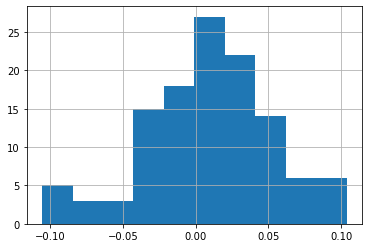

In [61]:
df['10 Year Portfolio Returns'].hist()

- The **sortino ratio** is similar to the sharpe ratio, but it only includes negative returns in the calculation of the portfolio's standard deviation - positive returns are replaced by 0. It serves to exclude the positive price movements of an asset from being included into its measure of risk.

- The **maximum drawdon** of the portfolio is simply the maximum drop in value a portfolio experiences (as a percentage) from its previous peak after hitting said peak.

The below code will calculate and display the metrics explained above for each portfolio, as well as their returns. Note that the cumulative returns are computed simply, while the annualized returns are calculated on a log-basis.

In [56]:
from tabulate import tabulate
#calculate annualized returns and sd's
portfolio_cumulative_r = [(df[i].iloc[-1]-df[i].iloc[0])/df[i].iloc[0] for i in ['Benchmark Value','10 Year Portfolio Value','5 Year Portfolio Value','2 Year Portfolio Value','1 Year Portfolio Value']]
portfolio_annualized_r = [12*df[i].mean() for i in ['Benchmark Returns','10 Year Portfolio Returns','5 Year Portfolio Returns','2 Year Portfolio Returns','1 Year Portfolio Returns']]
portfolio_annualized_sd = [np.sqrt(12*df[i].var()) for i in ['Benchmark Returns','10 Year Portfolio Returns','5 Year Portfolio Returns','2 Year Portfolio Returns','1 Year Portfolio Returns']]

#risk free rate as per https://www.multpl.com/10-year-treasury-rate/table/by-month
rf = 0.0193
#calculate sharpe ratios
portfolio_annualized_sharpe = [(i-rf)/j for (i,j) in zip(portfolio_annualized_r,portfolio_annualized_sd)]

#get z-quantile for VaR calculation
from scipy import stats
z_quant = stats.norm.ppf(0.05)
#calculate monthly 95% VaR
VaR = [df[i].mean()+z_quant*np.sqrt(df[i].var()) for i in ['Benchmark Returns','10 Year Portfolio Returns','5 Year Portfolio Returns','2 Year Portfolio Returns','1 Year Portfolio Returns']]

#create new df for sortino ratio calc
sort_df = df[['Benchmark Returns','10 Year Portfolio Returns','5 Year Portfolio Returns','2 Year Portfolio Returns','1 Year Portfolio Returns']]
sort_df = sort_df.mask(sort_df>0,0)
sort_sd = [np.sqrt(12*sort_df[i].var()) for i in ['Benchmark Returns','10 Year Portfolio Returns','5 Year Portfolio Returns','2 Year Portfolio Returns','1 Year Portfolio Returns']]
sort_ratio = [(i-rf)/j for (i,j) in zip(portfolio_annualized_r,sort_sd)]

#calculate max drawdown
max_drawdown = [min((df[i] - df[i].cummax())/df[i].cummax()) for i in ['Benchmark Value','10 Year Portfolio Value','5 Year Portfolio Value','2 Year Portfolio Value','1 Year Portfolio Value']]

table = [['Metric','Benchmark','No Rebalancing','Rebalance Every 5 Years','Rebalance Every 2 Years','Rebalance Yearly'],
         ['Cumulative Returns']+["{:.2%}".format(i) for i in portfolio_cumulative_r],
         ['Annualized Returns']+["{:.2%}".format(i) for i in portfolio_annualized_r],
         ['Sharpe Ratio']+["{:.3}".format(i) for i in portfolio_annualized_sharpe],
        ['Monthly 95% VaR']+["{:.2%}".format(i) for i in VaR],
        ['Sortino Ratio']+["{:.3}".format(i) for i in sort_ratio],
        ['Max Drawdown']+["{:.2%}".format(i) for i in max_drawdown]]


print(tabulate(table,headers='firstrow',tablefmt='pretty'))

+--------------------+-----------+----------------+-------------------------+-------------------------+------------------+
|       Metric       | Benchmark | No Rebalancing | Rebalance Every 5 Years | Rebalance Every 2 Years | Rebalance Yearly |
+--------------------+-----------+----------------+-------------------------+-------------------------+------------------+
| Cumulative Returns |  209.00%  |    175.32%     |         191.06%         |         177.29%         |     183.02%      |
| Annualized Returns |  11.38%   |     10.21%     |         10.77%          |         10.28%          |      10.49%      |
|    Sharpe Ratio    |   0.633   |     0.545      |          0.617          |          0.592          |      0.544       |
|  Monthly 95% VaR   |  -6.14%   |     -6.37%     |         -5.91%          |         -5.85%          |      -6.60%      |
|   Sortino Ratio    |   1.06    |     0.959      |          1.13           |          1.03           |      0.971       |
|    Max Drawdow

&emsp; Analyzing the above results, none of the constructed portfolios outperform the benchmark in returns as we saw from the portfolio balance graph previously. They also all underperform in terms of their sharpe ratios, although the portfolio with rebalancement every 5 years does outperform the benchmark when comparing their sortino ratios. This portfolio performed the best of the four constructed by almost every metric as it has the highest returns, sharpe ratio, and sortino ratio. However; all portfolios performed similarly, with only 0.56% points between the annualized returns of the 5 year portfolio and the portfolio with no rebalancement (which had the lowest returns of the four). They also seem to carry less severe downside risk than the benchmark, with the 5 and 2 year rebalancement portfolios carrying a lower VaR and all four having a lesser maximum drawdown by several percentage points. This intutively makes sense to a degree as we would expect companies with stronger financial conditions to have more stability. The counter force risk-wise for these portfolios is that they are much less diversified than the S&amp;P 500 with an average of only 16 holdings at a given time, and therefore they carry far more company specific risk than a more diversified index fund.

## 5. Conclusion and Limitations

&emsp; In conclusion, the Benjamin Graham portfolio constructed with his six updated criteria does seem to have some applicability to the modern investing environment. Specifically, an evenly weighted portfolio of NYSE listed stocks satisfying his criteria with rebalancement every 5 years performs adequately over the past 10 years compared to the S&P 500. While underperforming in terms of annualized returns by 0.6%, it has a higher sortino ratio, lower monthly VaR, and lesser maximum drawdown. The other portfolios also perform realtively well, with the worst performance being that of the portfolio with no rebalancement; its annualized returns were just over a percentage point lower than the benchmark's. Making inferences from the performances, it is perhaps the case that holding positions for longer than 5 years without rebalancing affects the portfolio negatively because company financials and valuations can change drastically over that time frame. Conversely, holding the mfor less than 5 years causes trading fees to eat too much into returns and in turn also affects the portfolio negatively. A portfolio created via the *Benjamin Graham* criteria has not outperformed the overall market in recent history but has shown less severe drawdowns and improved VaR in some cases, thus potentially having more stability as a portfolio. It could be of practical value to investors with certain investment time horizons.

&emsp; The above work has many limitations - most of which were already mentioned. Because of this, the results should be interpreted with some degree of uncertainty. They are presented in a condensed list below for convenience:

- The results are only as accurate as the data collected. There is no guarantee that the data, particularly the company financial data, is 100% accurate.
- The list of companies traded on the NYSE was taken from the current list on their website (as of June 22nd, 2023). A more accurate approach would be to have historical lists for each year that could be used as the initial list at that time to avoid the disinclusion of a company that was delisted (perhaps due to poor performance). Unfortunately this is not readily available. This issue could be building survivorship bias into the constructed portfolios, although given the heavy constraints the strategy places on companies' financial health and size, it may be negligible.
- Dividend reinvestment was made at the beginning of the month after the month the dividend was paid, rather than the day after. This may have adversely affected the presented returns of the portfolios, since the dividends were effectively not compounded over as many days as would have been possible in reality.
- The constant rebalancing fee of 1.5% is an over simplification - it would be more accurate to calculate the fee as a percentage of the portfolio that needs to be traded rather than the entire portfolio. For example, there may be positions that were not fully sold and positions that were not fully purchased from period to period if a company passes the criteria in two successive rebalancements.
- The backtest assumes that securities can be sold and purchased for their closing prices. This is unrealistic, as the trade would likely have to occur a few minutes prior to close and may involve a certain degree of slippage, but it is somewhat mitigated by the assumed rebalancement fee.
- There is a chance that lookahead bias is incorporated if any companies in the above portfolios released their prior year end results after May 1st of any of the years tested.

&emsp; There remains further investigation to be done into Benjamin Graham's strategy. A more sound approach to rectify the assumptions and limitations listed above is a natural extension. Additionally, testing the portfolios over different periods of historical data would serve to validate the presented results.

## 6. References

1. Graham, B., &amp; Zweig, J. (2003). *The Intelligent Investor.* Collins Business Essentials. 
2. Wilmott, P. (2007). *Frequently Asked Questions in Quantitative Finance.* John Wiley &amp; Sons Ltd
3. Coleman, D. (2013, March 5). When Does a Company’s Year End? *Audit Analytics.* https://blog.auditanalytics.com/when-does-a-companys-year-end/

## Appendix

- **List of companies passing the criteria for each year (portfolio constituents):**

In [126]:
index = range(2013,2023)
colnames = range(1,max([len(i) for i in final_tickers])+1)
df_com = pd.DataFrame(final_tickers,columns=colnames,index=index)
pd.set_option('display.max_columns', 500)
styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "150%"),
                              ("color", 'black')])]
df_com = df_com.style.set_caption('List of Companies Passing Criteria Each Year').set_table_styles(styles)
display(df_com)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
2013,VMI,TXN,SXT,RS,RRX,MMM,ITW,INTC,HUBB,HRL,HP,HAS,EXPD,ETR,DINO,CMI,CI,CCJ,ATR,AOS,AIT,None,None,None,None
2014,XEL,WWD,WTRG,WEC,VMI,SXT,SWX,SQM,RRX,PRG,NEE,MDT,LECO,INTC,IDA,HUBB,HP,DINO,DHR,DE,CMI,ATR,AOS,AIT,ABT
2015,WTRG,WEC,WDS,VMI,SXT,SWX,SQM,PRG,NJR,NEE,MDT,LECO,IDA,HUBB,HP,DINO,CMI,CI,ATR,None,None,None,None,None,None
2016,WTRG,WEC,WAB,VMI,SWX,NJR,NI,NEE,INTC,IDA,HUBB,HP,CMI,AVA,ATO,None,None,None,None,None,None,None,None,None,None
2017,WTRG,WEC,SWX,PCAR,NJR,NI,NEE,IDA,HE,ES,BAX,AVA,ATO,None,None,None,None,None,None,None,None,None,None,None,None
2018,WEC,UFPI,SWX,PRG,PCAR,NEE,LNT,IDA,HE,ES,ATO,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2019,WEC,UGI,SWX,RS,PRG,PCAR,NJR,NEE,MGEE,LNT,HE,ATO,AOS,None,None,None,None,None,None,None,None,None,None,None,None
2020,WEC,UGI,UFPI,SWX,RS,PEG,PCAR,NUE,NJR,NEE,LNT,HRL,DHI,ATO,AQN,None,None,None,None,None,None,None,None,None,None
2021,WEC,UGI,UFPI,SRE,RS,PEG,PCAR,NUE,NJR,NEE,LNT,HRL,DHI,CWT,ATO,AQN,None,None,None,None,None,None,None,None,None
2022,WOR,UGI,UFPI,SRE,RS,PCAR,NUE,FTS,DHI,CMC,ATO,AQN,None,None,None,None,None,None,None,None,None,None,None,None,None


- **Breakdown of sectors for companies passing the criteria in 2013, 2016, 2019, and 2022:**

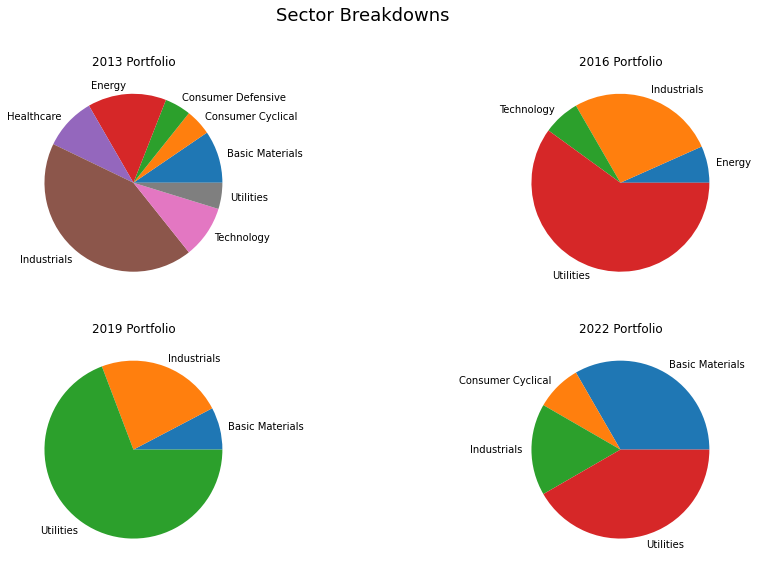

In [145]:
first_sectors = dict.fromkeys(np.unique(ticker_data['Sector'])[1:],0)
second_sectors = dict.fromkeys(np.unique(ticker_data['Sector'])[1:],0)
third_sectors = dict.fromkeys(np.unique(ticker_data['Sector'])[1:],0)
last_sectors = dict.fromkeys(np.unique(ticker_data['Sector'])[1:],0)
for ticker in final_tickers[0]:
    sector = ticker_data['Sector'][ticker_data['Ticker'].index(ticker)]
    first_sectors[sector] += 1
    
for ticker in final_tickers[3]:
    sector = ticker_data['Sector'][ticker_data['Ticker'].index(ticker)]
    second_sectors[sector] += 1
    
for ticker in final_tickers[6]:
    sector = ticker_data['Sector'][ticker_data['Ticker'].index(ticker)]
    third_sectors[sector] += 1

for ticker in final_tickers[len(final_tickers)-1]:
    sector = ticker_data['Sector'][ticker_data['Ticker'].index(ticker)]
    last_sectors[sector] += 1
    
first_labels = []
first_sector_figures = []
second_labels = []
second_sector_figures = []
third_labels = []
third_sector_figures = []
last_labels = []
last_sector_figures = []

for x,y in first_sectors.items():
    if y != 0:
        first_labels.append(x)
        first_sector_figures.append(y)

for x,y in second_sectors.items():
    if y != 0:
        second_labels.append(x)
        second_sector_figures.append(y)
        
for x,y in third_sectors.items():
    if y != 0:
        third_labels.append(x)
        third_sector_figures.append(y)

for x,y in last_sectors.items():
    if y != 0:
        last_labels.append(x)
        last_sector_figures.append(y)
        
            
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
fig.suptitle('Sector Breakdowns',fontsize=18)
ax1.title.set_text('2013 Portfolio')
ax2.title.set_text('2016 Portfolio')
ax3.title.set_text('2019 Portfolio')
ax4.title.set_text('2022 Portfolio')
ax1.pie(first_sector_figures,labels=first_labels)
ax2.pie(second_sector_figures,labels=second_labels) 
ax3.pie(third_sector_figures,labels=third_labels) 
ax4.pie(last_sector_figures,labels=last_labels) 
plt.subplots_adjust(wspace=0.2,hspace=0.2)

plt.show()

- **Fees paid by each portfolio:**

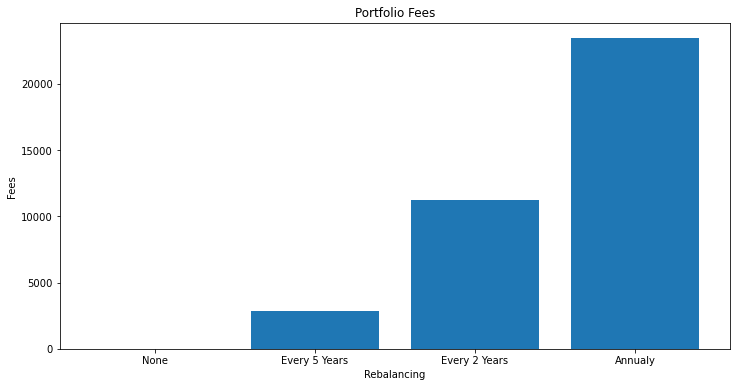

In [124]:
plt.figure(figsize=(12,6))
plt.bar(x=[1,2,3,4],height = [sum(i['Fees']) for i in [portfolio_10yr_perf,portfolio_5yr_perf,portfolio_2yr_perf,portfolio_1yr_perf]],tick_label=['None','Every 5 Years','Every 2 Years','Annualy'])
plt.xlabel('Rebalancing')
plt.ylabel('Fees')
plt.title('Portfolio Fees')
plt.show()

- **Dividends earned by each portfolio:**

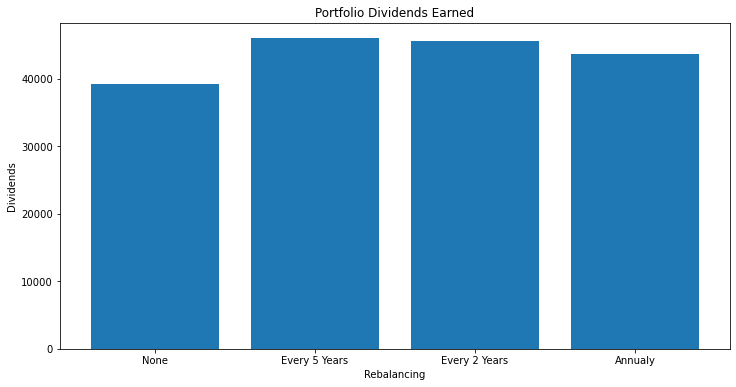

In [125]:
plt.figure(figsize=(12,6))
plt.bar(x=[1,2,3,4],height = [sum(i['Dividends']) for i in [portfolio_10yr_perf,portfolio_5yr_perf,portfolio_2yr_perf,portfolio_1yr_perf]],tick_label=['None','Every 5 Years','Every 2 Years','Annualy'])
plt.xlabel('Rebalancing')
plt.ylabel('Dividends')
plt.title('Portfolio Dividends Earned')
plt.show()

- **Trailing 12 month dividend payments for each portfolio:**

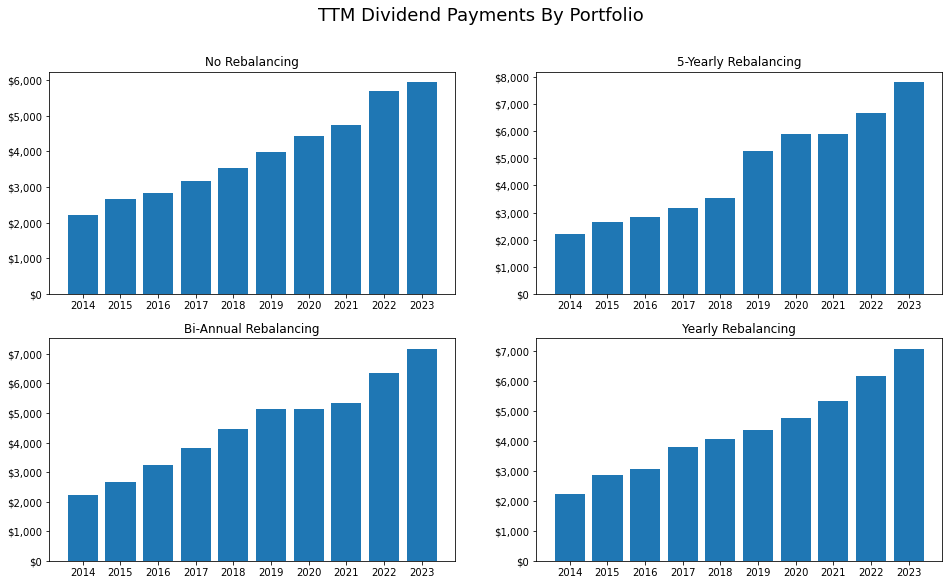

In [164]:
bar_labels = range(2014,2024)
may_indices = [int(i) for i in np.linspace(0,120,11)]
port_10yr_divs = [sum(portfolio_10yr_perf['Dividends'][may_indices[i]:may_indices[i+1]]) for i in range(0,len(may_indices)-1)]
port_5yr_divs = [sum(portfolio_5yr_perf['Dividends'][may_indices[i]:may_indices[i+1]]) for i in range(0,len(may_indices)-1)]
port_2yr_divs = [sum(portfolio_2yr_perf['Dividends'][may_indices[i]:may_indices[i+1]]) for i in range(0,len(may_indices)-1)]
port_1yr_divs = [sum(portfolio_1yr_perf['Dividends'][may_indices[i]:may_indices[i+1]]) for i in range(0,len(may_indices)-1)]

fig2 = plt.figure(figsize=(16,9))
div1 = fig2.add_subplot(221)
div2 = fig2.add_subplot(222)
div3 = fig2.add_subplot(223)
div4 = fig2.add_subplot(224)
fig2.suptitle('TTM Dividend Payments By Portfolio',fontsize=18)
div1.title.set_text('No Rebalancing')
div2.title.set_text('5-Yearly Rebalancing')
div3.title.set_text('Bi-Annual Rebalancing')
div4.title.set_text('Yearly Rebalancing')
div1.bar(x=range(1,11),height=port_10yr_divs,tick_label=bar_labels)
div2.bar(x=range(1,11),height=port_5yr_divs,tick_label=bar_labels)
div3.bar(x=range(1,11),height=port_2yr_divs,tick_label=bar_labels)
div4.bar(x=range(1,11),height=port_1yr_divs,tick_label=bar_labels)
div1.yaxis.set_major_formatter('${x:,.0f}')
div2.yaxis.set_major_formatter('${x:,.0f}')
div3.yaxis.set_major_formatter('${x:,.0f}')
div4.yaxis.set_major_formatter('${x:,.0f}')
plt.subplots_adjust(wspace=0.2,hspace=0.2)

plt.show()

- **Trailing twelve month dividend yields for each portfolio:**

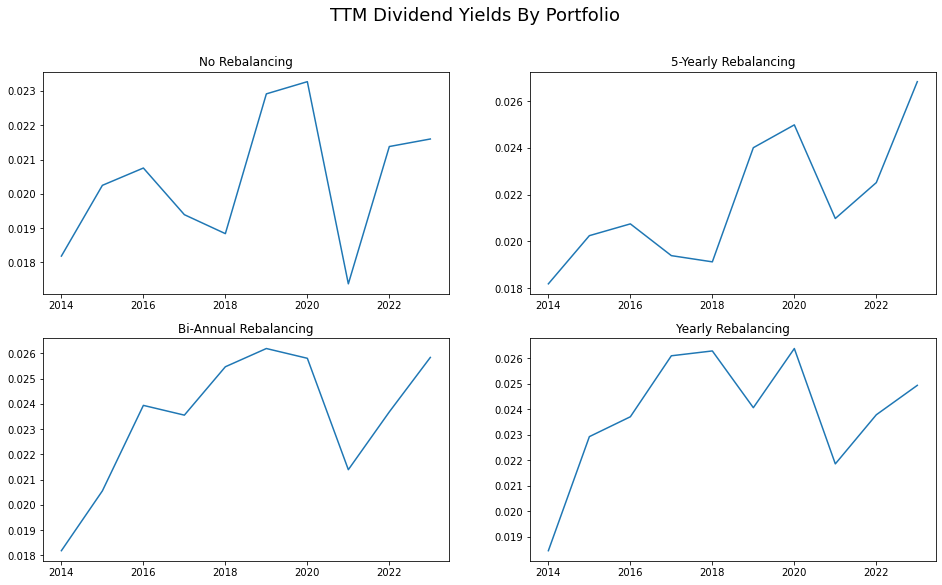

In [165]:
port_10yr_yield = np.array(port_10yr_divs)/np.array([portfolio_10yr_perf['Portfolio Balance'][may_indices[i]]for i in range(1,len(may_indices)-1)]+[portfolio_10yr_perf['Portfolio Balance'][len(portfolio_10yr_perf['Portfolio Balance'])-1]])
port_5yr_yield = np.array(port_5yr_divs)/np.array([portfolio_5yr_perf['Portfolio Balance'][may_indices[i]]for i in range(1,len(may_indices)-1)]+[portfolio_5yr_perf['Portfolio Balance'][len(portfolio_5yr_perf['Portfolio Balance'])-1]])
port_2yr_yield = np.array(port_2yr_divs)/np.array([portfolio_2yr_perf['Portfolio Balance'][may_indices[i]]for i in range(1,len(may_indices)-1)]+[portfolio_2yr_perf['Portfolio Balance'][len(portfolio_2yr_perf['Portfolio Balance'])-1]])
port_1yr_yield = np.array(port_1yr_divs)/np.array([portfolio_1yr_perf['Portfolio Balance'][may_indices[i]]for i in range(1,len(may_indices)-1)]+[portfolio_1yr_perf['Portfolio Balance'][len(portfolio_1yr_perf['Portfolio Balance'])-1]])

fig3 = plt.figure(figsize=(16,9))
y1 = fig3.add_subplot(221)
y2 = fig3.add_subplot(222)
y3 = fig3.add_subplot(223)
y4 = fig3.add_subplot(224)
fig3.suptitle('TTM Dividend Yields By Portfolio',fontsize=18)
y1.title.set_text('No Rebalancing')
y2.title.set_text('5-Yearly Rebalancing')
y3.title.set_text('Bi-Annual Rebalancing')
y4.title.set_text('Yearly Rebalancing')
y1.plot(bar_labels,port_10yr_yield)
y2.plot(bar_labels,port_5yr_yield)
y3.plot(bar_labels,port_2yr_yield)
y4.plot(bar_labels,port_1yr_yield)
plt.subplots_adjust(wspace=0.2,hspace=0.2)

plt.show()

In [ ]:
#save dict of fundamental data
import pickle
with open('company_fundamental_data.pkl','wb') as f:
    pickle.dump(ticker_data,f)